## 環境設置：安裝 Ultralytics & Roboflow

In [5]:
# Need for Colab
# Ref: https://github.com/googlecolab/colabtools/issues/3409
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [6]:
!pip install -qU ultralytics
!pip install -qU roboflow
!pip install -qU ipython

## 數據集下載：透過 Roboflow 來下載已標註好的數據集

In [7]:
from roboflow import Roboflow
rf = Roboflow(api_key="BuGw21MqNfhKEpapbCF4") #請放進你自己的api_key
project = rf.workspace("tokushima-university-luktu").project("kithen-utensils-detection-2")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...


## 模型下載：透過 Ultralytics 來下載 YOLO v11 模型

In [8]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")  # 載入一個官方版本模型

100%|██████████| 6.25M/6.25M [00:00<00:00, 173MB/s]


### 透過已下載之標註好的數據集來作微調

In [9]:
model_res = model.train(data="/content/Kithen-Utensils-Detection-2-1/data.yaml", epochs=250, imgsz=640, device=0)

Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Kithen-Utensils-Detection-2-1/data.yaml, epochs=250, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_c

100%|██████████| 755k/755k [00:00<00:00, 122MB/s]


Overriding model.yaml nc=80 with nc=7

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 195MB/s]


AMP: checks passed ✅


train: Scanning /content/Kithen-Utensils-Detection-2-1/train/labels... 616 images, 0 backgrounds, 0 corrupt: 100%|██████████| 616/616 [00:00<00:00, 1705.64it/s]

train: New cache created: /content/Kithen-Utensils-Detection-2-1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.22 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/Kithen-Utensils-Detection-2-1/valid/labels... 77 images, 0 backgrounds, 0 corrupt: 100%|██████████| 77/77 [00:00<00:00, 1198.86it/s]

val: New cache created: /content/Kithen-Utensils-Detection-2-1/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 250 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/250      2.29G      1.082      2.925      1.046         99        640: 100%|██████████| 39/39 [00:14<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.20s/it]

                   all         77        663          1      0.155      0.791      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/250      2.23G     0.7861      1.125     0.9261        104        640: 100%|██████████| 39/39 [00:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.67it/s]

                   all         77        663      0.967      0.597      0.971      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/250      2.24G     0.7188      0.844     0.9075        108        640: 100%|██████████| 39/39 [00:09<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.45it/s]


                   all         77        663      0.911      0.894      0.976      0.869

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/250      2.22G     0.6972     0.7469     0.9001         95        640: 100%|██████████| 39/39 [00:10<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.01it/s]

                   all         77        663      0.967      0.976      0.991      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/250      2.22G     0.7118     0.7039     0.8965         91        640: 100%|██████████| 39/39 [00:12<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.39it/s]

                   all         77        663      0.992      0.985      0.991      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/250      2.24G     0.6194     0.6527     0.8829        112        640: 100%|██████████| 39/39 [00:12<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.51it/s]

                   all         77        663      0.988      0.988      0.994      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/250      2.22G      0.621     0.6318     0.8857         88        640: 100%|██████████| 39/39 [00:11<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.84it/s]

                   all         77        663      0.989      0.991      0.993      0.902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/250      2.22G     0.6003     0.5986     0.8738        104        640: 100%|██████████| 39/39 [00:09<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.17it/s]

                   all         77        663      0.995      0.991      0.993        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/250      2.23G     0.5751     0.5769      0.871        110        640: 100%|██████████| 39/39 [00:10<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.22it/s]

                   all         77        663      0.992      0.987      0.994      0.902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/250      2.22G     0.6088      0.571      0.874        138        640: 100%|██████████| 39/39 [00:12<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.27it/s]

                   all         77        663      0.988      0.988      0.994      0.902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/250      2.23G     0.5811     0.5589     0.8715        120        640: 100%|██████████| 39/39 [00:12<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.47it/s]

                   all         77        663      0.995      0.986      0.994      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/250      2.23G     0.5334     0.5229     0.8665         93        640: 100%|██████████| 39/39 [00:09<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]

                   all         77        663      0.992       0.99      0.994      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/250      2.25G      0.548     0.5252      0.867         99        640: 100%|██████████| 39/39 [00:10<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.37it/s]

                   all         77        663      0.996      0.989      0.993      0.901



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/250      2.23G     0.5352      0.509     0.8668         89        640: 100%|██████████| 39/39 [00:12<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.80it/s]

                   all         77        663      0.998      0.987      0.994      0.922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/250      2.24G     0.5337     0.4971     0.8645        117        640: 100%|██████████| 39/39 [00:12<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.84it/s]

                   all         77        663      0.992       0.99      0.994      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/250      2.25G     0.5202     0.4854     0.8606        102        640: 100%|██████████| 39/39 [00:10<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.97it/s]

                   all         77        663      0.996      0.987      0.994       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/250      2.22G     0.5406     0.4835     0.8653         77        640: 100%|██████████| 39/39 [00:09<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.87it/s]

                   all         77        663      0.988       0.99      0.993      0.914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/250      2.22G     0.5357     0.4735     0.8614         91        640: 100%|██████████| 39/39 [00:12<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.79it/s]

                   all         77        663      0.994      0.993      0.995      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/250      2.24G     0.5149     0.4565      0.858        108        640: 100%|██████████| 39/39 [00:12<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.56it/s]

                   all         77        663      0.996       0.99      0.994      0.927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/250      2.23G     0.5418     0.4621     0.8656        115        640: 100%|██████████| 39/39 [00:11<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.72it/s]

                   all         77        663      0.993      0.989      0.994       0.93



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/250      2.22G     0.5023     0.4482     0.8577        101        640: 100%|██████████| 39/39 [00:09<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]


                   all         77        663      0.994      0.991      0.994      0.914

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/250      2.23G     0.5311     0.4561      0.862        109        640: 100%|██████████| 39/39 [00:11<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.63it/s]

                   all         77        663      0.995      0.994      0.995       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/250      2.24G     0.5051     0.4356     0.8598        102        640: 100%|██████████| 39/39 [00:12<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.82it/s]

                   all         77        663      0.997      0.991      0.994      0.923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/250      2.25G     0.5035     0.4325     0.8582        113        640: 100%|██████████| 39/39 [00:11<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.81it/s]

                   all         77        663      0.994      0.988      0.995      0.922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/250      2.22G     0.5172     0.4362     0.8626        146        640: 100%|██████████| 39/39 [00:10<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.24it/s]


                   all         77        663      0.996      0.994      0.995      0.926

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/250      2.21G     0.4978     0.4228     0.8558         71        640: 100%|██████████| 39/39 [00:10<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]

                   all         77        663      0.995      0.989      0.995      0.914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/250      2.24G     0.4958     0.4164     0.8569        122        640: 100%|██████████| 39/39 [00:11<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.44it/s]

                   all         77        663      0.995      0.993      0.995      0.932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/250      2.23G     0.4756     0.4035     0.8503        109        640: 100%|██████████| 39/39 [00:12<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.73it/s]

                   all         77        663      0.991      0.991      0.994      0.938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/250      2.24G     0.4929     0.4086      0.855        121        640: 100%|██████████| 39/39 [00:11<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.73it/s]

                   all         77        663      0.993      0.995      0.995       0.93



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/250      2.21G     0.4871     0.4037     0.8596         60        640: 100%|██████████| 39/39 [00:09<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.75it/s]

                   all         77        663      0.998      0.987      0.994      0.924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/250      2.25G     0.4701     0.3927     0.8505         88        640: 100%|██████████| 39/39 [00:12<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.21it/s]

                   all         77        663      0.996      0.994      0.995      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/250      2.22G     0.4816     0.3877     0.8506         93        640: 100%|██████████| 39/39 [00:12<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.62it/s]

                   all         77        663      0.993      0.995      0.995      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/250      2.22G     0.4604     0.3741     0.8496         51        640: 100%|██████████| 39/39 [00:11<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.82it/s]

                   all         77        663       0.99      0.994      0.995      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/250      2.23G     0.4561     0.3708     0.8492        103        640: 100%|██████████| 39/39 [00:09<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.45it/s]

                   all         77        663      0.993      0.993      0.995      0.938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/250      2.25G     0.4781     0.3792     0.8503        119        640: 100%|██████████| 39/39 [00:11<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.56it/s]

                   all         77        663      0.997      0.991      0.995      0.938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/250      2.23G     0.4748      0.383     0.8525        128        640: 100%|██████████| 39/39 [00:12<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.98it/s]

                   all         77        663      0.999      0.989      0.995      0.934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/250      2.23G     0.4674     0.3754     0.8501        145        640: 100%|██████████| 39/39 [00:12<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.43it/s]

                   all         77        663      0.995      0.994      0.995      0.934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/250      2.23G     0.4711     0.3632     0.8488        102        640: 100%|██████████| 39/39 [00:10<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.05it/s]

                   all         77        663      0.995      0.991      0.995      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/250      2.22G     0.4744     0.3708     0.8512         95        640: 100%|██████████| 39/39 [00:09<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.85it/s]

                   all         77        663      0.994      0.992      0.995      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/250      2.23G     0.4565     0.3616     0.8471        114        640: 100%|██████████| 39/39 [00:11<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.16it/s]

                   all         77        663      0.995      0.993      0.995      0.927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/250      2.23G      0.469     0.3647     0.8506        105        640: 100%|██████████| 39/39 [00:12<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.91it/s]

                   all         77        663      0.996      0.991      0.995      0.946



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/250      2.21G     0.4658     0.3571     0.8501        118        640: 100%|██████████| 39/39 [00:11<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.65it/s]

                   all         77        663      0.993      0.995      0.995      0.941



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/250       2.3G     0.4605     0.3532     0.8472         84        640: 100%|██████████| 39/39 [00:10<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.66it/s]

                   all         77        663      0.996      0.995      0.995       0.93



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/250      2.25G     0.4698     0.3597     0.8478         91        640: 100%|██████████| 39/39 [00:11<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.13it/s]

                   all         77        663      0.994      0.991      0.995      0.944



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/250      2.25G     0.4679     0.3577     0.8458        164        640: 100%|██████████| 39/39 [00:12<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.85it/s]

                   all         77        663      0.995       0.99      0.995      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/250      2.23G     0.4513       0.35     0.8468        118        640: 100%|██████████| 39/39 [00:12<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.15it/s]

                   all         77        663      0.993      0.994      0.994       0.95



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/250      2.25G     0.4317     0.3377     0.8427        136        640: 100%|██████████| 39/39 [00:10<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.09it/s]

                   all         77        663      0.991      0.994      0.995      0.943



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/250      2.24G     0.4454     0.3394      0.844        130        640: 100%|██████████| 39/39 [00:10<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.34it/s]

                   all         77        663      0.997      0.991      0.995      0.942



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/250      2.25G     0.4558     0.3439     0.8458         89        640: 100%|██████████| 39/39 [00:12<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.95it/s]

                   all         77        663      0.995      0.996      0.995      0.938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/250      2.21G     0.4654     0.3502     0.8495         99        640: 100%|██████████| 39/39 [00:12<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.22it/s]

                   all         77        663      0.994      0.994      0.995      0.952



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/250       2.3G     0.4378     0.3307     0.8448         71        640: 100%|██████████| 39/39 [00:11<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.80it/s]

                   all         77        663      0.995      0.991      0.995      0.953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/250      2.23G     0.4357     0.3296      0.841         63        640: 100%|██████████| 39/39 [00:09<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.58it/s]


                   all         77        663      0.997      0.993      0.995      0.952

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/250      2.31G     0.4299     0.3304     0.8421        147        640: 100%|██████████| 39/39 [00:11<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.57it/s]

                   all         77        663      0.995      0.992      0.995      0.946



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/250      2.23G     0.4336     0.3263     0.8405        150        640: 100%|██████████| 39/39 [00:12<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.35it/s]

                   all         77        663      0.994      0.992      0.995      0.941



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/250      2.25G     0.4479     0.3349     0.8454        112        640: 100%|██████████| 39/39 [00:12<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.46it/s]

                   all         77        663      0.993      0.996      0.995      0.929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/250      2.24G     0.4632     0.3389     0.8453        106        640: 100%|██████████| 39/39 [00:11<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.88it/s]

                   all         77        663      0.996      0.994      0.995       0.93



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/250      2.24G     0.4467     0.3308     0.8433        144        640: 100%|██████████| 39/39 [00:09<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.29it/s]

                   all         77        663      0.993      0.993      0.995      0.951



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/250      2.23G     0.4211     0.3147     0.8427         65        640: 100%|██████████| 39/39 [00:11<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.71it/s]

                   all         77        663      0.993      0.993      0.995       0.95



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/250      2.24G     0.4286     0.3134     0.8424         70        640: 100%|██████████| 39/39 [00:12<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.85it/s]

                   all         77        663      0.993      0.994      0.995      0.954



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/250      2.25G     0.4242      0.314     0.8432         74        640: 100%|██████████| 39/39 [00:12<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.25it/s]

                   all         77        663      0.993      0.993      0.995       0.95



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/250      2.23G     0.4437     0.3247      0.844        103        640: 100%|██████████| 39/39 [00:09<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.07it/s]

                   all         77        663      0.993      0.996      0.995      0.952



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/250      2.21G       0.43      0.316     0.8406        120        640: 100%|██████████| 39/39 [00:10<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.53it/s]

                   all         77        663      0.993      0.995      0.995      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/250      2.31G     0.4298     0.3188     0.8452        155        640: 100%|██████████| 39/39 [00:12<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.65it/s]

                   all         77        663      0.996      0.992      0.995      0.953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/250       2.3G      0.419     0.3114     0.8423         98        640: 100%|██████████| 39/39 [00:12<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.84it/s]

                   all         77        663      0.999       0.99      0.995      0.955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/250      2.25G     0.4279     0.3154      0.843        110        640: 100%|██████████| 39/39 [00:10<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.05it/s]

                   all         77        663      0.995      0.991      0.995      0.952



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/250      2.23G     0.4304     0.3194     0.8426         77        640: 100%|██████████| 39/39 [00:09<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.09it/s]

                   all         77        663      0.992      0.994      0.995      0.953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/250      2.24G     0.4349     0.3192     0.8417        133        640: 100%|██████████| 39/39 [00:12<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.13it/s]

                   all         77        663      0.998      0.988      0.995      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/250      2.22G      0.425     0.3118     0.8421         93        640: 100%|██████████| 39/39 [00:12<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.97it/s]

                   all         77        663      0.996      0.991      0.995      0.951



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/250      2.22G     0.4221     0.3085     0.8388        139        640: 100%|██████████| 39/39 [00:13<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.88it/s]

                   all         77        663      0.995      0.992      0.995      0.942



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/250      2.23G     0.4212     0.3107     0.8382        102        640: 100%|██████████| 39/39 [00:11<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.83it/s]

                   all         77        663      0.994      0.993      0.995      0.952



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/250      2.21G     0.4218     0.3068     0.8422        108        640: 100%|██████████| 39/39 [00:10<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.41it/s]

                   all         77        663      0.992      0.992      0.995      0.955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/250      2.22G     0.4214     0.3086     0.8433         60        640: 100%|██████████| 39/39 [00:12<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.08it/s]

                   all         77        663      0.992      0.995      0.995      0.951



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/250      2.22G     0.4172     0.3016     0.8377         82        640: 100%|██████████| 39/39 [00:12<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.68it/s]

                   all         77        663      0.994      0.995      0.995      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/250      2.23G     0.4348     0.3064     0.8406        105        640: 100%|██████████| 39/39 [00:12<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.90it/s]

                   all         77        663      0.996      0.993      0.995      0.951



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/250      2.24G     0.4269     0.3042     0.8432        138        640: 100%|██████████| 39/39 [00:10<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.96it/s]

                   all         77        663      0.993      0.994      0.995      0.957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/250      2.21G     0.4129     0.2978      0.838        122        640: 100%|██████████| 39/39 [00:10<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.19it/s]

                   all         77        663       0.99      0.996      0.995      0.948



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/250      2.24G      0.421     0.2999     0.8382         98        640: 100%|██████████| 39/39 [00:12<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.13it/s]

                   all         77        663      0.997      0.993      0.995      0.952



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/250       2.2G     0.4148     0.3018     0.8386        132        640: 100%|██████████| 39/39 [00:13<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.32it/s]

                   all         77        663      0.996      0.992      0.995      0.952



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/250       2.2G     0.4146     0.2993     0.8358        116        640: 100%|██████████| 39/39 [00:13<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.92it/s]

                   all         77        663      0.996      0.993      0.995       0.96



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/250      2.24G     0.4143      0.298     0.8351        130        640: 100%|██████████| 39/39 [00:11<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.95it/s]

                   all         77        663      0.992      0.996      0.995      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/250      2.23G     0.4204     0.3008      0.838         89        640: 100%|██████████| 39/39 [00:10<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.30it/s]

                   all         77        663      0.996      0.989      0.995      0.955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/250      2.32G     0.4132     0.2973     0.8375         85        640: 100%|██████████| 39/39 [00:13<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.64it/s]

                   all         77        663      0.996      0.993      0.995      0.953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/250      2.24G     0.4096     0.2973     0.8345         78        640: 100%|██████████| 39/39 [00:13<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.12it/s]

                   all         77        663      0.997      0.995      0.995      0.954



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/250      2.22G     0.4069       0.29     0.8407        112        640: 100%|██████████| 39/39 [00:12<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.88it/s]

                   all         77        663      0.994      0.993      0.995      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/250       2.2G     0.4147     0.2972     0.8398        136        640: 100%|██████████| 39/39 [00:10<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.08it/s]

                   all         77        663      0.993      0.994      0.995      0.949



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/250      2.23G     0.4078     0.2957     0.8396         82        640: 100%|██████████| 39/39 [00:11<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.69it/s]

                   all         77        663      0.997      0.992      0.995      0.959



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/250      2.22G      0.406     0.2912       0.84         98        640: 100%|██████████| 39/39 [00:13<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.46it/s]

                   all         77        663      0.999      0.989      0.995      0.951



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/250      2.25G     0.4154     0.2993     0.8371        100        640: 100%|██████████| 39/39 [00:12<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.35it/s]

                   all         77        663      0.996       0.99      0.995      0.955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/250      2.21G     0.4072     0.2878     0.8354         95        640: 100%|██████████| 39/39 [00:13<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.66it/s]

                   all         77        663      0.996      0.994      0.995      0.959



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/250      2.23G     0.4074      0.287     0.8379        115        640: 100%|██████████| 39/39 [00:11<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.80it/s]

                   all         77        663      0.996      0.993      0.995      0.961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/250      2.24G     0.4063     0.2815     0.8346         94        640: 100%|██████████| 39/39 [00:10<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.58it/s]

                   all         77        663      0.993      0.996      0.995       0.95



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/250      2.25G     0.4002     0.2785     0.8371        112        640: 100%|██████████| 39/39 [00:12<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.75it/s]

                   all         77        663      0.996      0.993      0.995      0.958



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/250      2.22G     0.3852     0.2743     0.8322         84        640: 100%|██████████| 39/39 [00:12<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.53it/s]

                   all         77        663      0.997      0.994      0.995      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/250      2.24G     0.3853      0.276     0.8341         87        640: 100%|██████████| 39/39 [00:13<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]

                   all         77        663      0.995      0.995      0.995      0.959



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/250      2.24G      0.392     0.2828     0.8351        106        640: 100%|██████████| 39/39 [00:11<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.78it/s]

                   all         77        663      0.997      0.992      0.995      0.953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/250       2.2G     0.4027     0.2852     0.8361        148        640: 100%|██████████| 39/39 [00:10<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.22it/s]

                   all         77        663      0.997      0.993      0.995      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/250      2.24G     0.4026     0.2819     0.8357        117        640: 100%|██████████| 39/39 [00:12<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.43it/s]

                   all         77        663      0.993      0.997      0.995      0.959



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/250      2.21G     0.3966      0.283     0.8362        106        640: 100%|██████████| 39/39 [00:12<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.81it/s]

                   all         77        663      0.992      0.995      0.995      0.957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/250      2.22G     0.3856      0.274     0.8338         80        640: 100%|██████████| 39/39 [00:12<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.72it/s]

                   all         77        663      0.992      0.995      0.995      0.962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/250      2.24G     0.3892     0.2752     0.8362         82        640: 100%|██████████| 39/39 [00:12<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.61it/s]

                   all         77        663      0.994      0.993      0.995      0.959



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/250      2.24G     0.3903     0.2747     0.8341        104        640: 100%|██████████| 39/39 [00:10<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.87it/s]

                   all         77        663      0.995      0.992      0.995      0.962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/250      2.23G     0.3981     0.2777     0.8323         92        640: 100%|██████████| 39/39 [00:11<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.68it/s]

                   all         77        663      0.993      0.995      0.995      0.959



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/250      2.25G     0.3892     0.2729     0.8329        105        640: 100%|██████████| 39/39 [00:13<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.11it/s]

                   all         77        663      0.996      0.991      0.995      0.962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/250      2.23G     0.3711      0.265     0.8308        143        640: 100%|██████████| 39/39 [00:13<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.10it/s]

                   all         77        663      0.995      0.992      0.995       0.96



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/250      2.23G     0.3876     0.2734     0.8334         97        640: 100%|██████████| 39/39 [00:12<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.24it/s]

                   all         77        663      0.992      0.995      0.995      0.959



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/250       2.3G     0.3899      0.272     0.8331        125        640: 100%|██████████| 39/39 [00:10<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.91it/s]

                   all         77        663      0.994      0.994      0.995      0.959



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/250      2.25G     0.3829     0.2716     0.8336        147        640: 100%|██████████| 39/39 [00:11<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.83it/s]

                   all         77        663      0.995      0.994      0.995      0.961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/250      2.29G     0.3887     0.2719     0.8338        144        640: 100%|██████████| 39/39 [00:12<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.62it/s]

                   all         77        663      0.997      0.992      0.995      0.959



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/250      2.25G     0.3865     0.2696     0.8351        144        640: 100%|██████████| 39/39 [00:13<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.71it/s]

                   all         77        663      0.996      0.992      0.995      0.959



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/250      2.24G     0.3937      0.272     0.8354        129        640: 100%|██████████| 39/39 [00:12<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.64it/s]

                   all         77        663      0.995      0.995      0.995      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/250      2.24G     0.3865     0.2699      0.834         69        640: 100%|██████████| 39/39 [00:10<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.85it/s]

                   all         77        663      0.991      0.996      0.995      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/250      2.22G     0.3805     0.2686     0.8294         78        640: 100%|██████████| 39/39 [00:10<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.99it/s]

                   all         77        663      0.992      0.997      0.995      0.959



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/250      2.22G     0.3796     0.2666     0.8303         97        640: 100%|██████████| 39/39 [00:12<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.66it/s]

                   all         77        663      0.991      0.997      0.995      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/250      2.21G     0.3675     0.2603     0.8299        118        640: 100%|██████████| 39/39 [00:13<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.65it/s]

                   all         77        663      0.994      0.995      0.995      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/250      2.24G     0.3781     0.2626      0.831        132        640: 100%|██████████| 39/39 [00:13<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.66it/s]

                   all         77        663      0.995      0.995      0.995      0.962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/250      2.23G     0.3906     0.2728     0.8337        108        640: 100%|██████████| 39/39 [00:11<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.95it/s]

                   all         77        663      0.996      0.992      0.995      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/250      2.31G     0.3826      0.267     0.8316         92        640: 100%|██████████| 39/39 [00:10<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.62it/s]


                   all         77        663      0.994      0.994      0.995      0.964

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/250      2.21G     0.3794     0.2649     0.8303        152        640: 100%|██████████| 39/39 [00:12<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.36it/s]

                   all         77        663      0.994      0.993      0.995      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/250      2.24G     0.3766     0.2643     0.8328        121        640: 100%|██████████| 39/39 [00:13<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.64it/s]

                   all         77        663      0.995      0.994      0.995      0.961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/250      2.24G     0.3765     0.2627     0.8323        125        640: 100%|██████████| 39/39 [00:12<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.60it/s]

                   all         77        663      0.994      0.993      0.995      0.961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/250      2.23G     0.3735     0.2602     0.8324         93        640: 100%|██████████| 39/39 [00:11<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.86it/s]

                   all         77        663      0.993      0.995      0.995      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/250      2.21G     0.3751     0.2598     0.8301        117        640: 100%|██████████| 39/39 [00:10<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.97it/s]

                   all         77        663      0.994      0.995      0.995      0.966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/250      2.23G     0.3774     0.2599     0.8326        104        640: 100%|██████████| 39/39 [00:12<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.25it/s]

                   all         77        663      0.996      0.994      0.995      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/250      2.22G     0.3775     0.2586     0.8306        118        640: 100%|██████████| 39/39 [00:12<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.42it/s]

                   all         77        663      0.994      0.995      0.995      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/250      2.25G     0.3631     0.2572     0.8304        146        640: 100%|██████████| 39/39 [00:13<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.35it/s]

                   all         77        663      0.992      0.995      0.995      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/250      2.24G     0.3797     0.2617     0.8337         83        640: 100%|██████████| 39/39 [00:11<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.10it/s]

                   all         77        663      0.992      0.996      0.995      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/250      2.23G      0.379     0.2574     0.8328         79        640: 100%|██████████| 39/39 [00:10<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.89it/s]

                   all         77        663      0.995      0.993      0.995      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/250      2.33G     0.3725     0.2565     0.8314        121        640: 100%|██████████| 39/39 [00:12<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.62it/s]

                   all         77        663      0.996      0.993      0.995      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/250      2.21G     0.3744     0.2589     0.8296         95        640: 100%|██████████| 39/39 [00:13<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.12it/s]

                   all         77        663      0.994      0.993      0.995      0.962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/250       2.2G     0.3679     0.2541     0.8285        153        640: 100%|██████████| 39/39 [00:13<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.61it/s]

                   all         77        663      0.994      0.994      0.995      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/250      2.22G     0.3679     0.2543     0.8296         99        640: 100%|██████████| 39/39 [00:11<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.79it/s]

                   all         77        663      0.997      0.992      0.995      0.968



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/250      2.24G     0.3707     0.2556     0.8295         90        640: 100%|██████████| 39/39 [00:10<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.73it/s]

                   all         77        663      0.993      0.995      0.995      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/250      2.23G     0.3661      0.252     0.8319         92        640: 100%|██████████| 39/39 [00:12<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.79it/s]

                   all         77        663      0.995      0.993      0.995      0.966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/250      2.32G     0.3791     0.2607     0.8305         80        640: 100%|██████████| 39/39 [00:13<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.30it/s]

                   all         77        663      0.994      0.995      0.995      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/250      2.27G     0.3778     0.2581     0.8304        150        640: 100%|██████████| 39/39 [00:12<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.29it/s]

                   all         77        663      0.996      0.994      0.995      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/250      2.22G     0.3635     0.2504     0.8258         60        640: 100%|██████████| 39/39 [00:11<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.85it/s]

                   all         77        663      0.995      0.994      0.995      0.966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/250      2.22G     0.3656     0.2506     0.8272         99        640: 100%|██████████| 39/39 [00:09<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.73it/s]

                   all         77        663      0.996      0.993      0.995      0.969



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/250      2.22G     0.3639     0.2496     0.8277        101        640: 100%|██████████| 39/39 [00:12<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.82it/s]

                   all         77        663      0.998      0.995      0.995      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/250      2.22G     0.3541     0.2489     0.8267        102        640: 100%|██████████| 39/39 [00:12<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.91it/s]

                   all         77        663      0.996      0.994      0.995      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/250      2.21G     0.3636      0.247     0.8284        108        640: 100%|██████████| 39/39 [00:13<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.75it/s]

                   all         77        663      0.996      0.995      0.995      0.966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/250      2.22G     0.3547      0.244     0.8272        110        640: 100%|██████████| 39/39 [00:11<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.67it/s]

                   all         77        663      0.997      0.995      0.995      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/250      2.21G     0.3569     0.2455     0.8287         90        640: 100%|██████████| 39/39 [00:10<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.25it/s]

                   all         77        663      0.997      0.993      0.995      0.966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/250      2.24G     0.3684     0.2505     0.8297         96        640: 100%|██████████| 39/39 [00:12<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.52it/s]

                   all         77        663      0.997      0.994      0.995      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/250      2.22G     0.3717     0.2522     0.8289        121        640: 100%|██████████| 39/39 [00:13<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.49it/s]

                   all         77        663      0.996      0.994      0.995      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/250      2.22G     0.3761     0.2554     0.8287        105        640: 100%|██████████| 39/39 [00:13<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.06it/s]

                   all         77        663      0.997      0.996      0.995      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/250      2.21G       0.36     0.2479     0.8268        115        640: 100%|██████████| 39/39 [00:12<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.76it/s]

                   all         77        663      0.994      0.994      0.995      0.966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/250      2.23G     0.3668     0.2483     0.8281        127        640: 100%|██████████| 39/39 [00:10<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.89it/s]

                   all         77        663      0.997      0.995      0.995      0.969



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/250      2.33G     0.3679     0.2492     0.8305        118        640: 100%|██████████| 39/39 [00:11<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.23it/s]

                   all         77        663      0.997      0.991      0.995      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/250      2.23G     0.3602     0.2465     0.8282         57        640: 100%|██████████| 39/39 [00:12<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.96it/s]

                   all         77        663      0.998      0.993      0.995      0.969



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/250      2.29G     0.3549     0.2421     0.8284        112        640: 100%|██████████| 39/39 [00:13<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.92it/s]

                   all         77        663      0.997      0.995      0.995      0.968



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/250      2.24G     0.3545      0.241     0.8278        121        640: 100%|██████████| 39/39 [00:12<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.81it/s]

                   all         77        663      0.995      0.995      0.995      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/250      2.25G     0.3662     0.2458     0.8289         92        640: 100%|██████████| 39/39 [00:10<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.06it/s]

                   all         77        663      0.995      0.994      0.995       0.97



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/250      2.23G     0.3592     0.2433     0.8301         96        640: 100%|██████████| 39/39 [00:11<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.63it/s]

                   all         77        663      0.997      0.993      0.995      0.969



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/250      2.29G     0.3582     0.2411     0.8253        112        640: 100%|██████████| 39/39 [00:13<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.95it/s]

                   all         77        663      0.998      0.995      0.995      0.968



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/250      2.27G     0.3657     0.2433     0.8306        102        640: 100%|██████████| 39/39 [00:13<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.73it/s]

                   all         77        663      0.996      0.996      0.995       0.97



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/250      2.25G     0.3617     0.2442     0.8288        110        640: 100%|██████████| 39/39 [00:11<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.83it/s]

                   all         77        663      0.992      0.997      0.995       0.97



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/250      2.24G     0.3542     0.2433     0.8241        133        640: 100%|██████████| 39/39 [00:09<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.67it/s]

                   all         77        663      0.996      0.994      0.995      0.969



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/250      2.21G      0.356     0.2445     0.8242         76        640: 100%|██████████| 39/39 [00:11<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.86it/s]

                   all         77        663      0.997      0.992      0.995       0.97



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/250      2.25G     0.3557     0.2416     0.8275        110        640: 100%|██████████| 39/39 [00:12<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.51it/s]

                   all         77        663      0.996      0.994      0.995      0.968



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/250      2.22G      0.354     0.2423     0.8279         81        640: 100%|██████████| 39/39 [00:13<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.26it/s]

                   all         77        663      0.997      0.995      0.995      0.968



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/250      2.22G     0.3559     0.2448     0.8231        142        640: 100%|██████████| 39/39 [00:11<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.91it/s]

                   all         77        663      0.994      0.995      0.995      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/250      2.21G     0.3594     0.2414      0.823        118        640: 100%|██████████| 39/39 [00:10<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.60it/s]


                   all         77        663      0.995      0.996      0.995      0.967

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/250      2.22G     0.3556     0.2397     0.8257        143        640: 100%|██████████| 39/39 [00:12<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.66it/s]

                   all         77        663      0.995      0.994      0.995      0.969



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/250      2.22G     0.3555     0.2391     0.8238        101        640: 100%|██████████| 39/39 [00:12<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.73it/s]

                   all         77        663      0.996      0.994      0.995      0.968



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/250      2.23G     0.3529     0.2384     0.8262        103        640: 100%|██████████| 39/39 [00:12<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.62it/s]

                   all         77        663      0.995      0.993      0.995       0.97



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/250      2.32G     0.3486     0.2352     0.8257         99        640: 100%|██████████| 39/39 [00:09<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.87it/s]

                   all         77        663      0.996      0.995      0.995       0.97



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/250      2.27G     0.3462     0.2348     0.8254        110        640: 100%|██████████| 39/39 [00:11<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.68it/s]

                   all         77        663      0.994      0.996      0.995      0.972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/250      2.25G      0.358     0.2414      0.829        146        640: 100%|██████████| 39/39 [00:12<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.78it/s]

                   all         77        663      0.996      0.995      0.995      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/250      2.23G     0.3514     0.2378     0.8245        107        640: 100%|██████████| 39/39 [00:12<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.41it/s]

                   all         77        663      0.996       0.99      0.995      0.969



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/250      2.31G     0.3475     0.2355     0.8253         83        640: 100%|██████████| 39/39 [00:12<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.61it/s]

                   all         77        663      0.994      0.995      0.995       0.97



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/250      2.25G     0.3509     0.2373     0.8277         86        640: 100%|██████████| 39/39 [00:09<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.98it/s]

                   all         77        663      0.994      0.995      0.995       0.97



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/250      2.25G     0.3535     0.2359     0.8307        123        640: 100%|██████████| 39/39 [00:11<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.60it/s]

                   all         77        663      0.996      0.995      0.995      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/250      2.23G     0.3419     0.2311     0.8248         79        640: 100%|██████████| 39/39 [00:12<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.79it/s]

                   all         77        663      0.996      0.995      0.995      0.968



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/250       2.2G     0.3483     0.2309     0.8269         90        640: 100%|██████████| 39/39 [00:13<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.94it/s]

                   all         77        663      0.992      0.997      0.995      0.969



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/250      2.24G     0.3485     0.2344     0.8265        101        640: 100%|██████████| 39/39 [00:10<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.94it/s]

                   all         77        663      0.995      0.996      0.995      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/250      2.25G     0.3475     0.2315     0.8241         75        640: 100%|██████████| 39/39 [00:10<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.80it/s]

                   all         77        663      0.995      0.994      0.995      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/250      2.23G     0.3419     0.2309     0.8252         93        640: 100%|██████████| 39/39 [00:12<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.69it/s]

                   all         77        663      0.998      0.995      0.995       0.97



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/250      2.24G     0.3469     0.2299     0.8258         83        640: 100%|██████████| 39/39 [00:12<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.81it/s]

                   all         77        663      0.995      0.995      0.995      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/250      2.24G     0.3435     0.2322     0.8259        118        640: 100%|██████████| 39/39 [00:11<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.95it/s]

                   all         77        663      0.994      0.997      0.995      0.972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/250      2.23G     0.3483     0.2317     0.8279        123        640: 100%|██████████| 39/39 [00:09<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.22it/s]

                   all         77        663      0.997      0.994      0.995       0.97



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/250      2.24G     0.3416     0.2344     0.8264         79        640: 100%|██████████| 39/39 [00:11<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.78it/s]

                   all         77        663      0.997      0.995      0.995      0.969



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/250      2.21G     0.3431     0.2302     0.8262        116        640: 100%|██████████| 39/39 [00:13<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.80it/s]


                   all         77        663      0.995      0.995      0.995      0.969

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/250      2.24G     0.3362     0.2251     0.8253         99        640: 100%|██████████| 39/39 [00:12<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.27it/s]

                   all         77        663      0.996      0.995      0.995      0.969



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/250      2.22G     0.3469     0.2326     0.8247         81        640: 100%|██████████| 39/39 [00:10<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.81it/s]

                   all         77        663      0.997      0.994      0.995      0.966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/250      2.23G     0.3442     0.2326     0.8253        104        640: 100%|██████████| 39/39 [00:10<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.80it/s]

                   all         77        663      0.995      0.996      0.995      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/250       2.3G     0.3339     0.2265     0.8238        121        640: 100%|██████████| 39/39 [00:12<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.58it/s]

                   all         77        663      0.993      0.996      0.995      0.969



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/250      2.24G     0.3478     0.2294     0.8267        138        640: 100%|██████████| 39/39 [00:12<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.60it/s]

                   all         77        663      0.996      0.995      0.995      0.973



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/250      2.21G      0.339     0.2239     0.8275        109        640: 100%|██████████| 39/39 [00:12<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.07it/s]

                   all         77        663      0.996      0.995      0.995      0.972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/250      2.24G     0.3472     0.2282      0.827        148        640: 100%|██████████| 39/39 [00:09<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.35it/s]

                   all         77        663      0.995      0.996      0.995      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/250      2.22G     0.3301     0.2219      0.822         80        640: 100%|██████████| 39/39 [00:11<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.37it/s]

                   all         77        663      0.995      0.996      0.995      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/250      2.24G     0.3341     0.2229     0.8253        111        640: 100%|██████████| 39/39 [00:12<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.91it/s]

                   all         77        663      0.993      0.996      0.995      0.969



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/250      2.22G     0.3362     0.2254     0.8261        120        640: 100%|██████████| 39/39 [00:12<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.65it/s]

                   all         77        663      0.994      0.995      0.995       0.97



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/250      2.23G      0.338     0.2263      0.827         82        640: 100%|██████████| 39/39 [00:11<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.84it/s]

                   all         77        663      0.996      0.996      0.995      0.969



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/250      2.32G     0.3365     0.2248     0.8251         82        640: 100%|██████████| 39/39 [00:09<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.79it/s]

                   all         77        663      0.996      0.997      0.995      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/250      2.24G     0.3325     0.2214     0.8272        123        640: 100%|██████████| 39/39 [00:11<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.96it/s]

                   all         77        663      0.996      0.996      0.995      0.972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/250      2.25G     0.3302     0.2227     0.8238        116        640: 100%|██████████| 39/39 [00:13<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.41it/s]

                   all         77        663      0.996      0.996      0.995       0.97



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/250      2.22G     0.3422     0.2271     0.8248         92        640: 100%|██████████| 39/39 [00:12<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.52it/s]

                   all         77        663      0.997      0.996      0.995      0.969



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/250      2.24G      0.339     0.2232     0.8252        108        640: 100%|██████████| 39/39 [00:10<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.92it/s]

                   all         77        663      0.995      0.996      0.995      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/250      2.22G     0.3275     0.2202     0.8228        107        640: 100%|██████████| 39/39 [00:10<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.76it/s]

                   all         77        663      0.996      0.996      0.995      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/250      2.24G      0.334     0.2212     0.8239        118        640: 100%|██████████| 39/39 [00:11<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.87it/s]

                   all         77        663      0.996      0.995      0.995      0.973



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    201/250      2.22G     0.3333     0.2226     0.8216        167        640: 100%|██████████| 39/39 [00:13<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.98it/s]

                   all         77        663      0.995      0.995      0.995      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    202/250      2.21G     0.3291     0.2175     0.8231        162        640: 100%|██████████| 39/39 [00:12<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.96it/s]

                   all         77        663      0.995      0.996      0.995       0.97



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    203/250      2.23G     0.3256     0.2205      0.822         87        640: 100%|██████████| 39/39 [00:10<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]

                   all         77        663      0.995      0.996      0.995      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    204/250      2.31G     0.3317     0.2211     0.8224        101        640: 100%|██████████| 39/39 [00:10<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.23it/s]

                   all         77        663      0.994      0.997      0.995       0.97



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    205/250       2.3G     0.3263     0.2189       0.82        151        640: 100%|██████████| 39/39 [00:12<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.09it/s]

                   all         77        663      0.995      0.996      0.995       0.97



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    206/250      2.22G     0.3255     0.2183      0.822         81        640: 100%|██████████| 39/39 [00:12<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.97it/s]

                   all         77        663      0.996      0.995      0.995      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    207/250      2.22G     0.3347     0.2224     0.8238        130        640: 100%|██████████| 39/39 [00:12<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.57it/s]

                   all         77        663      0.997      0.996      0.995      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    208/250      2.22G     0.3272     0.2201     0.8241         99        640: 100%|██████████| 39/39 [00:10<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.39it/s]

                   all         77        663      0.995      0.996      0.995       0.97



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    209/250      2.23G     0.3259      0.219     0.8201        144        640: 100%|██████████| 39/39 [00:10<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.46it/s]

                   all         77        663      0.994      0.995      0.995      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    210/250      2.22G     0.3222      0.216     0.8221        120        640: 100%|██████████| 39/39 [00:12<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.77it/s]

                   all         77        663      0.996      0.995      0.995      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    211/250      2.32G     0.3336     0.2195     0.8271         84        640: 100%|██████████| 39/39 [00:12<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.65it/s]

                   all         77        663      0.994      0.995      0.995       0.97



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    212/250      2.23G     0.3296      0.218     0.8221        126        640: 100%|██████████| 39/39 [00:11<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.80it/s]

                   all         77        663      0.994      0.996      0.995       0.97



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    213/250      2.31G     0.3228     0.2143     0.8228        115        640: 100%|██████████| 39/39 [00:09<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.39it/s]

                   all         77        663      0.994      0.996      0.995      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    214/250      2.31G     0.3277     0.2168     0.8234        118        640: 100%|██████████| 39/39 [00:11<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.77it/s]

                   all         77        663      0.996      0.996      0.995      0.972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    215/250      2.24G      0.334       0.22      0.824        103        640: 100%|██████████| 39/39 [00:12<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.73it/s]

                   all         77        663      0.995      0.995      0.995      0.969



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    216/250      2.21G     0.3172     0.2131     0.8207         97        640: 100%|██████████| 39/39 [00:12<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.51it/s]

                   all         77        663      0.995      0.996      0.995      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    217/250      2.24G     0.3188     0.2101     0.8217         89        640: 100%|██████████| 39/39 [00:10<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.00it/s]

                   all         77        663      0.997      0.994      0.995      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    218/250      2.21G     0.3244     0.2137     0.8226         97        640: 100%|██████████| 39/39 [00:10<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.97it/s]

                   all         77        663      0.995      0.995      0.995      0.969



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    219/250      2.23G     0.3172     0.2112     0.8217        112        640: 100%|██████████| 39/39 [00:12<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.85it/s]

                   all         77        663      0.998      0.995      0.995      0.972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    220/250      2.24G     0.3238     0.2137      0.825        140        640: 100%|██████████| 39/39 [00:12<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.49it/s]

                   all         77        663      0.997      0.997      0.995      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    221/250      2.22G     0.3183     0.2101     0.8207        153        640: 100%|██████████| 39/39 [00:11<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.30it/s]

                   all         77        663      0.997      0.996      0.995      0.973



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    222/250      2.21G     0.3167     0.2108     0.8231         78        640: 100%|██████████| 39/39 [00:10<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.94it/s]


                   all         77        663      0.996      0.995      0.995       0.97

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    223/250      2.22G     0.3198     0.2109     0.8237        120        640: 100%|██████████| 39/39 [00:10<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.37it/s]

                   all         77        663      0.995      0.996      0.995      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    224/250      2.24G     0.3183     0.2103     0.8219         83        640: 100%|██████████| 39/39 [00:12<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.70it/s]

                   all         77        663      0.994      0.996      0.995      0.969



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    225/250      2.25G     0.3229     0.2124     0.8217        121        640: 100%|██████████| 39/39 [00:12<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.31it/s]

                   all         77        663      0.996      0.996      0.995       0.97



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    226/250      2.19G     0.3158      0.209     0.8209        109        640: 100%|██████████| 39/39 [00:11<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.09it/s]

                   all         77        663      0.996      0.995      0.995      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    227/250      2.24G     0.3185     0.2095     0.8223        113        640: 100%|██████████| 39/39 [00:09<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.42it/s]

                   all         77        663      0.995      0.995      0.995       0.97



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    228/250      2.22G     0.3265     0.2131     0.8242        102        640: 100%|██████████| 39/39 [00:11<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.73it/s]

                   all         77        663      0.995      0.997      0.995      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    229/250      2.23G     0.3161     0.2097     0.8196        116        640: 100%|██████████| 39/39 [00:12<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.63it/s]

                   all         77        663      0.995      0.996      0.995      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    230/250      2.21G     0.3215     0.2115      0.822         96        640: 100%|██████████| 39/39 [00:12<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.31it/s]

                   all         77        663      0.995      0.995      0.995      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    231/250       2.3G     0.3173     0.2085     0.8212        116        640: 100%|██████████| 39/39 [00:10<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.02it/s]

                   all         77        663      0.996      0.995      0.995      0.972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    232/250      2.23G     0.3117     0.2074     0.8189        120        640: 100%|██████████| 39/39 [00:10<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.45it/s]

                   all         77        663      0.995      0.996      0.995      0.972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    233/250      2.22G     0.3193     0.2079     0.8214         98        640: 100%|██████████| 39/39 [00:12<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.66it/s]

                   all         77        663      0.995      0.997      0.995      0.972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    234/250      2.22G     0.3155     0.2067     0.8212         94        640: 100%|██████████| 39/39 [00:12<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.75it/s]

                   all         77        663      0.997      0.995      0.995      0.973



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    235/250      2.24G     0.3107     0.2067     0.8181        108        640: 100%|██████████| 39/39 [00:12<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.76it/s]

                   all         77        663      0.997      0.995      0.995      0.972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    236/250      2.25G     0.3165     0.2072     0.8208         69        640: 100%|██████████| 39/39 [00:10<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.98it/s]

                   all         77        663      0.997      0.995      0.995       0.97



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    237/250      2.22G     0.3096     0.2058     0.8211         82        640: 100%|██████████| 39/39 [00:10<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.60it/s]

                   all         77        663      0.996      0.997      0.995      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    238/250      2.22G     0.3102     0.2043     0.8211        109        640: 100%|██████████| 39/39 [00:12<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.64it/s]

                   all         77        663      0.996      0.996      0.995      0.972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    239/250      2.23G     0.3109     0.2047     0.8163        101        640: 100%|██████████| 39/39 [00:13<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.35it/s]

                   all         77        663      0.996      0.994      0.995      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    240/250      2.22G     0.3138     0.2062     0.8181         99        640: 100%|██████████| 39/39 [00:11<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.08it/s]

                   all         77        663      0.998      0.995      0.995      0.972


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    241/250      2.23G     0.2873     0.1874     0.7923         66        640: 100%|██████████| 39/39 [00:11<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.28it/s]

                   all         77        663      0.996      0.995      0.995      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    242/250      2.18G     0.2829     0.1812     0.7907         67        640: 100%|██████████| 39/39 [00:10<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.01it/s]

                   all         77        663      0.996      0.994      0.995      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    243/250      2.19G     0.2852     0.1801     0.7942         64        640: 100%|██████████| 39/39 [00:12<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.22it/s]

                   all         77        663      0.997      0.995      0.995      0.972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    244/250      2.19G     0.2802     0.1779     0.7924         67        640: 100%|██████████| 39/39 [00:12<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.47it/s]


                   all         77        663      0.997      0.994      0.995      0.971

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    245/250      2.19G     0.2795     0.1778     0.7929         52        640: 100%|██████████| 39/39 [00:09<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.42it/s]

                   all         77        663      0.997      0.994      0.995       0.97



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    246/250      2.18G      0.279     0.1785     0.7898         62        640: 100%|██████████| 39/39 [00:10<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.87it/s]

                   all         77        663      0.996      0.994      0.995      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    247/250      2.19G     0.2752     0.1733      0.789         64        640: 100%|██████████| 39/39 [00:11<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.51it/s]

                   all         77        663      0.997      0.994      0.995      0.972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    248/250      2.19G     0.2779     0.1753     0.7893         61        640: 100%|██████████| 39/39 [00:11<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.76it/s]

                   all         77        663      0.995      0.994      0.995      0.973



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    249/250      2.19G     0.2786     0.1772      0.791         69        640: 100%|██████████| 39/39 [00:09<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.65it/s]


                   all         77        663      0.997      0.994      0.995      0.972

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    250/250      2.18G     0.2777     0.1752     0.7949         68        640: 100%|██████████| 39/39 [00:11<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.75it/s]

                   all         77        663      0.997      0.994      0.995      0.972



250 epochs completed in 0.947 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,007,013 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.05it/s]


                   all         77        663      0.996      0.996      0.995      0.973
          Desert-Spoon         77         77      0.996          1      0.995      0.979
           Dinner-Fork         71         71          1      0.986      0.995      0.937
         Kitchen-Knife         71         71      0.998          1      0.995      0.981
                Peeler         77         77      0.996          1      0.995      0.985
         Serving-Spoon         77        136      0.993      0.985      0.995      0.982
             Tea-Spoon         77        154      0.998          1      0.995      0.955
                 Whisk         77         77      0.996          1      0.995      0.993
Speed: 0.4ms preprocess, 2.4ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/detect/train


### 用資料集的數據來作預測

In [10]:
from ultralytics import YOLO

# 載入剛剛訓練好的模型
model = YOLO("runs/detect/train/weights/best.pt")  # load an official model

# 對影像執行偵測任務（在 python 介面透過 python 來執行任務）
results = model('/content/Kithen-Utensils-Detection-2-1/test/images/image_0342_png.rf.0f1334492a3ee813a9ff1089c99b808c.jpg', save=True)

# 方法二：透過指令行界面（Command Line Interface，CLI）使用 yolo 指令來執行偵測任務
# %cd {HOME}
# %yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source='/content/298382.jpg' save=True


image 1/1 /content/Kithen-Utensils-Detection-2-1/test/images/image_0342_png.rf.0f1334492a3ee813a9ff1089c99b808c.jpg: 640x640 1 Desert-Spoon, 1 Dinner-Fork, 1 Kitchen-Knife, 1 Peeler, 2 Serving-Spoons, 2 Tea-Spoons, 1 Whisk, 7.4ms
Speed: 1.6ms preprocess, 7.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


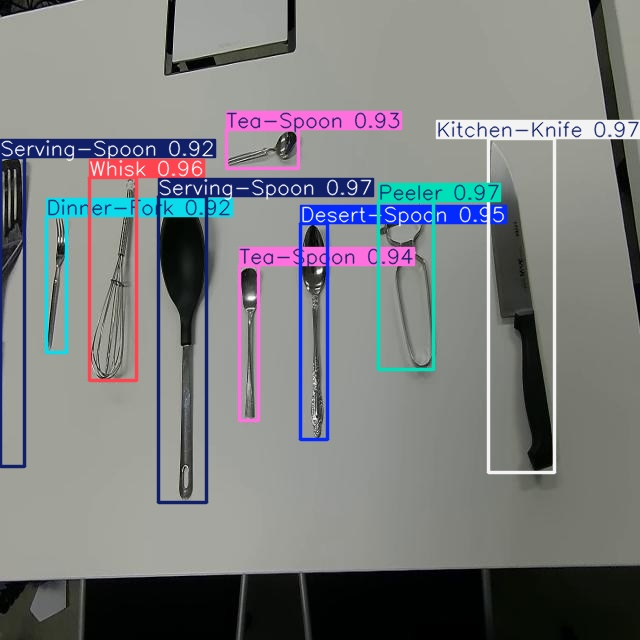

In [11]:
from IPython.display import Image
Image('/content/runs/detect/predict/image_0342_png.rf.0f1334492a3ee813a9ff1089c99b808c.jpg')

請透過偵測結果來衡量訓練的模型之優劣。

* Hint1: 可以透過訓練的參數（如epoch, imgsz等）或訓練好的資料夾所提供的資料(`/content/runs/detect/train/results.csv`、`/content/runs/detect/train/train_batch0.jpg` 等資料 來分析)
* Hint2: 可以到 Roboflow 看原始標註，並比較原始標註和使用微調後模型的偵測結果。可以提出一些你所能想到的可能造成差異原因。